In [37]:
import pandas as pd
import numpy as np
import plotly.express as px
from fbprophet import Prophet

In [11]:
search = pd.read_csv('data/AMSSearch.csv')
search_details = pd.read_csv('data/AMSSearchDetail.csv')

In [57]:
search[search.id == 11816]

,Unnamed: 0,id,ad_group,target,search_term,campaign,term,match_type
11825,11825,11816,4901,62772,clean well,1239,clean well,EXACT


In [55]:
search_details.search_id.value_counts()

11864    106
11816     76
364       72
11809     71
11939     68
        ... 
26501      1
22403      1
24450      1
14207      1
12210      1
Name: search_id, Length: 14717, dtype: int64

In [33]:
search_details = search_details.sort_values(by='date')

In [58]:
data = search_details[search_details.search_id == 11816]
data

,search_id,date,impressions,clicks,CTR,CpC,spend,ACoS,RoAS,sales,orders,units,conversions_rate,advertised_asin_units,advertised_asin_sales,advertised_brand_units,advertised_brand_sales
21201,11816,1/1/20,127,1,0.007874,0.60,0.60,NaN,0.0000,0.00,0,0,0.000000,0,0.00,0,0.0
22457,11816,1/10/20,28,1,0.035714,0.91,0.91,0.063238,0.1581,14.39,1,1,1.000000,1,14.39,0,0.0
23527,11816,1/13/20,27,1,0.037037,0.91,0.91,0.063238,0.1581,14.39,1,1,1.000000,1,14.39,0,0.0
23528,11816,1/14/20,41,1,0.024390,0.32,0.32,NaN,0.0000,0.00,0,0,0.000000,0,0.00,0,0.0
23529,11816,1/16/20,42,2,0.047619,0.91,1.82,0.126477,0.0791,14.39,1,1,0.500000,1,14.39,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27566,11816,2/2/20,12,3,0.250000,0.39,1.17,0.034946,0.2862,33.48,1,2,0.333333,2,33.48,0,0.0
27567,11816,2/3/20,48,2,0.041667,0.87,1.74,0.103943,0.0962,16.74,1,1,0.500000,1,16.74,0,0.0
27568,11816,2/4/20,44,4,0.090909,0.89,3.57,NaN,0.0000,0.00,0,0,0.000000,0,0.00,0,0.0
27569,11816,2/5/20,49,3,0.061224,0.93,2.80,NaN,0.0000,0.00,0,0,0.000000,0,0.00,0,0.0


In [59]:
fig = px.line(data, x='date', y='clicks')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [60]:
df = data[['clicks', 'date']].rename(columns={"clicks": "y", "date": "ds"})
m = Prophet()

In [61]:
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
436,2021-02-01
437,2021-02-02
438,2021-02-03
439,2021-02-04
440,2021-02-05


In [62]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
436,2021-02-01,2.426607,1.092478,3.696881
437,2021-02-02,2.687550,1.346989,3.998543
438,2021-02-03,2.714750,1.396717,4.007786
439,2021-02-04,1.938226,0.608163,3.161322
440,2021-02-05,2.255623,0.796840,3.610832


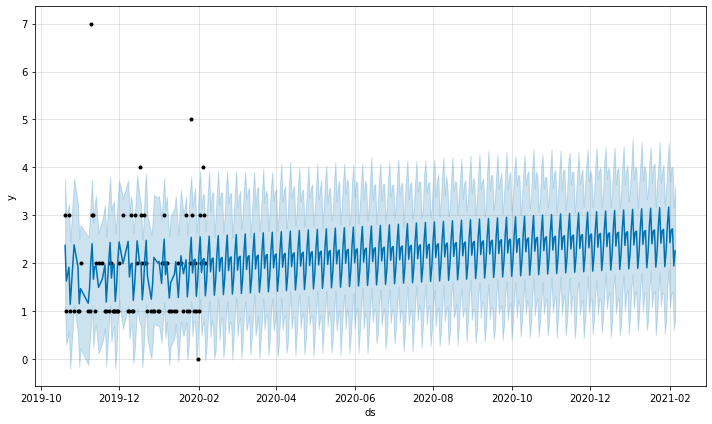

In [63]:
fig1 = m.plot(forecast)

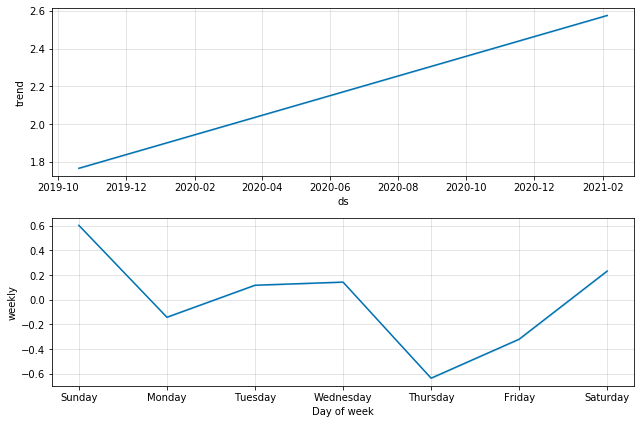

In [64]:
fig2 = m.plot_components(forecast)

In [65]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [66]:
plot_components_plotly(m, forecast)

In [72]:
search_details.groupby(search_details.search_id).sum().sort_values(by='sales', ascending = False)

,impressions,clicks,CTR,CpC,spend,ACoS,RoAS,sales,orders,units,conversions_rate,advertised_asin_units,advertised_asin_sales,advertised_brand_units,advertised_brand_sales
search_id,,,,,,,,,,,,,,,
11864,7050,400,6.548456,97.58,379.87,13.605311,10.6047,3635.92,213,281,57.375752,250,3100.71,31,535.21
16880,3719,254,4.349010,64.78,283.12,5.689777,5.7621,2988.74,151,161,32.363889,128,2531.11,33,457.63
364,4331,292,5.496748,76.58,317.88,9.856017,6.6942,2455.77,165,234,41.533730,192,1965.82,42,489.95
11802,3839,127,2.573854,66.21,121.42,2.557149,14.8100,1848.71,68,147,37.589278,114,1153.75,33,694.96
12081,5632,169,3.576888,54.89,160.96,3.405529,7.2994,1760.56,75,89,26.316666,68,1430.73,21,329.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10384,2,1,0.500000,1.83,1.83,0.000000,0.0000,0.00,0,0,0.000000,0,0.00,0,0.00
10385,1,1,1.000000,0.62,0.62,0.000000,0.0000,0.00,0,0,0.000000,0,0.00,0,0.00
10395,1,1,1.000000,1.14,1.14,0.000000,0.0000,0.00,0,0,0.000000,0,0.00,0,0.00


In [77]:
search[search.id == 12081]

,Unnamed: 0,id,ad_group,target,search_term,campaign,term,match_type
13626,13626,12081,4929,74052,cleanwell hand sanitizer,1237,cleanwell hand sanitizer,EXACT


In [78]:
search_details = search_details.join(search.set_index('id'), on = 'search_id')

In [85]:
search_details = search_details.drop(columns = ['target', 'Unnamed: 0'])

In [86]:
search_details.T

,20935,21751,21327,21756,21767,20986,21315,21312,21783,21788,...,5105,5107,5108,5693,5691,5117,5682,5671,5656,5532
search_id,12594,21755,20386,21759,21771,13651,17796,19549,20669,21792,...,5109,5111,1700,1447,4694,215,3762,1435,5660,5536
date,1/1/20,1/1/20,1/1/20,1/1/20,1/1/20,1/1/20,1/1/20,1/1/20,1/1/20,1/1/20,...,9/9/19,9/9/19,9/9/19,9/9/19,9/9/19,9/9/19,9/9/19,9/9/19,9/9/19,9/9/19
impressions,13,258,15,708,982,2,370,16,343,8,...,15,3,1351,2,50,39,193,70,1,107
clicks,1,2,1,1,2,2,1,1,2,1,...,1,2,1,1,1,1,1,1,1,1
CTR,0.076923,0.007752,0.066667,0.001412,0.002037,1,0.002703,0.0625,0.005831,0.125,...,0.066667,0.666667,0.00074,0.5,0.02,0.025641,0.005181,0.014286,1,0.009346
CpC,1.99,1.07,1.84,1.23,2.41,1.7,1.28,1.97,1.83,2.56,...,1.57,0.84,0.9,1.56,1.2,1.04,1.46,1.03,0.68,1.17
spend,1.99,2.13,1.84,1.23,4.81,3.4,1.28,1.97,3.66,2.56,...,1.57,1.67,0.9,1.56,1.2,1.04,1.46,1.03,0.68,1.17
ACoS,NaN,NaN,NaN,0.341667,NaN,NaN,NaN,0.102073,NaN,NaN,...,NaN,NaN,NaN,0.07606,NaN,NaN,0.215022,NaN,NaN,0.443182
RoAS,0,0,0,0.0293,0,0,0,0.098,0,0,...,0,0,0,0.1315,0,0,0.0465,0,0,0.0226
sales,0,0,0,3.6,0,0,0,19.3,0,0,...,0,0,0,20.51,0,0,6.79,0,0,2.64


In [87]:
search_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28359 entries, 20935 to 5532
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   search_id               28359 non-null  int64  
 1   date                    28359 non-null  object 
 2   impressions             28359 non-null  int64  
 3   clicks                  28359 non-null  int64  
 4   CTR                     28346 non-null  float64
 5   CpC                     28287 non-null  float64
 6   spend                   28359 non-null  float64
 7   ACoS                    6389 non-null   float64
 8   RoAS                    28287 non-null  float64
 9   sales                   28359 non-null  float64
 10  orders                  28359 non-null  int64  
 11  units                   28359 non-null  int64  
 12  conversions_rate        28287 non-null  float64
 13  advertised_asin_units   28359 non-null  int64  
 14  advertised_asin_sales   28359 non-n

In [94]:
search_details[search_details.term == 'hand sanitizer'].campaign.value_counts()

1248    1894
1240    1277
2042     758
1231     299
1244      23
Name: campaign, dtype: int64

In [93]:
search_details.term.value_counts()

hand sanitizer                            4251
*                                         3392
hand soaps                                1013
cleanwell                                  832
clean well                                 636
                                          ... 
seventh generation cleaner all purpose       1
7th generation disinfectant spray            1
bathroom cleaner spray                       1
bleach plant based                           1
puracy foaming hand soap                     1
Name: term, Length: 754, dtype: int64

In [ ]:
# term - hand sanitizer 
# ca